# Introduction

In [15]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Setting the folder and data path.

In [16]:
train_path = "D:/martin03in/PUP/STB/2024/Trainings/DAP_Executive_Course/Part_II/ECDS-NeuralNets/Motor_Data/Training_Data"
test_path = "D:/martin03in/PUP/STB/2024/Trainings/DAP_Executive_Course/Part_II/ECDS-NeuralNets/Motor_Data/Test_Data"
image_path = "D:/martin03in/PUP/STB/2024/Trainings/DAP_Executive_Course/Part_II/ECDS-NeuralNets/Motor_Data/Test_Data/017.bmp"

# Creating a simple CNN class.

In [17]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 18 * 18, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 18 * 18)
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x
    
model = SimpleCNN()
criterion = nn.BCELoss()

# Creating various functions.

In [18]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    train_loss = []
    train_accuracy = []

    for epoch in range(num_epochs):
        model.train()

        correct = 0
        total = 0
        running_loss = 0.0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels.float())
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = (outputs.squeeze() > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        accuracy = correct / total * 100
        train_loss.append(epoch_loss)
        train_accuracy.append(accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return train_loss, train_accuracy


def validate_model(model, val_loader, criterion):
    model.eval()

    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels.float())
            running_loss += loss.item()

            predicted = (outputs.squeeze() > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = running_loss / len(val_loader)
    accuracy = correct / total * 100

    print(f"validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

def predict_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)

    model.eval()

    with torch.no_grad():
        output = model(image)
        prediction = 'full-load status\n\n' if output.item() < 0.5 else 'no-load status\n\n'
    
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.show()
    print(f"At {prediction}.")

def predict_images_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.bmp', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            print(f"Predicting for {filename}...")
            predict_image(image_path)

transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Creating optimizers

In [19]:
optimizer = [
    optim.Adagrad(model.parameters(), lr=0.001),
    optim.Adam(model.parameters(), lr=0.001),
    optim.SGD(model.parameters(), lr=0.001, momentum=0.8)
]

opti_name = [
    "Adagrad",
    "Adam",
    "SGD"
]

# Training

In [20]:
full_dataset = datasets.ImageFolder(train_path, transform=transform)

train_size = int(0.8*len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



# Predictions

Epoch [1/5], Loss: 0.8914, Accuracy: 79.66%
Epoch [2/5], Loss: 0.3632, Accuracy: 91.53%
Epoch [3/5], Loss: 0.1687, Accuracy: 89.83%
Epoch [4/5], Loss: 0.1131, Accuracy: 100.00%
Epoch [5/5], Loss: 0.0726, Accuracy: 100.00%
validation Loss: 0.0448, Accuracy: 100.00%


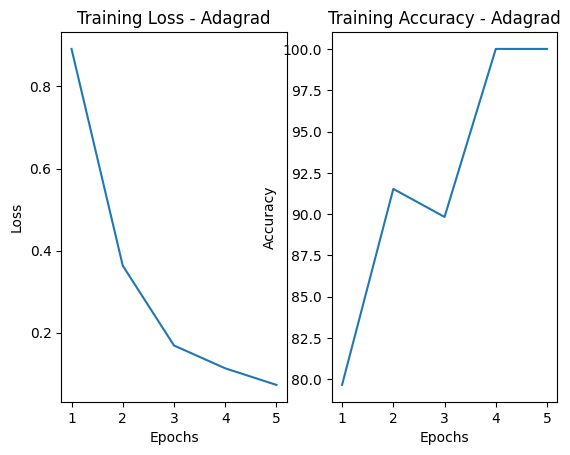

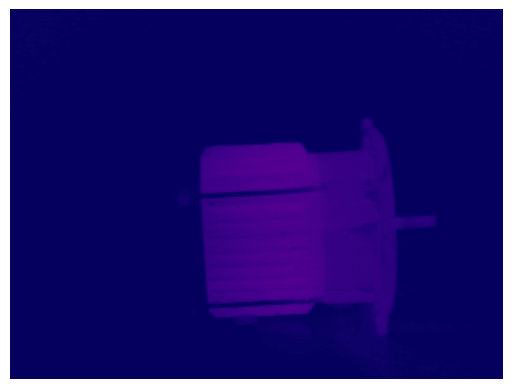

At no-load status

.
Predicting for 012.bmp...


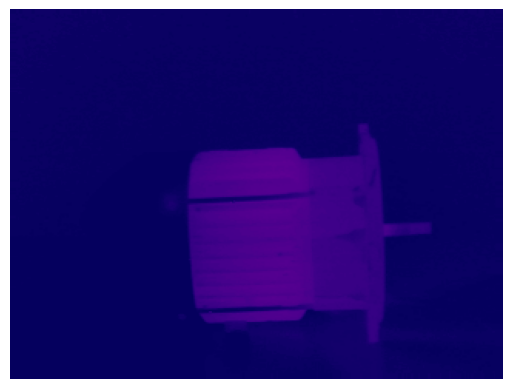

At no-load status

.
Predicting for 017.bmp...


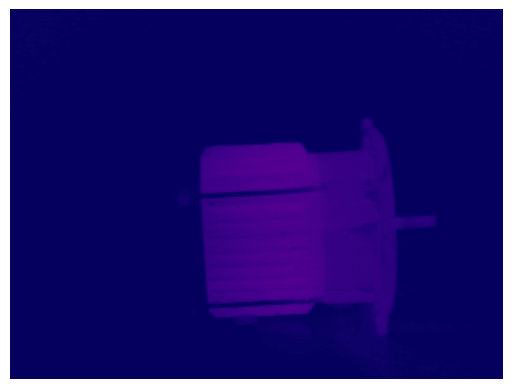

At no-load status

.
Predicting for f068.bmp...


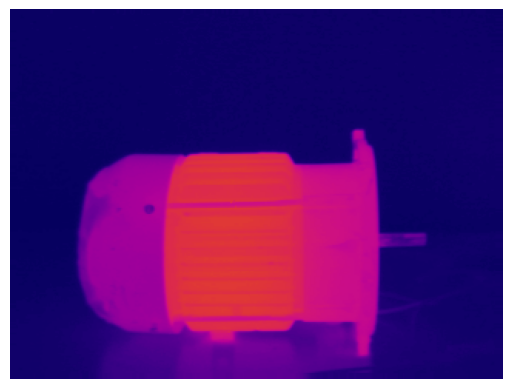

At full-load status

.
Predicting for f084.bmp...


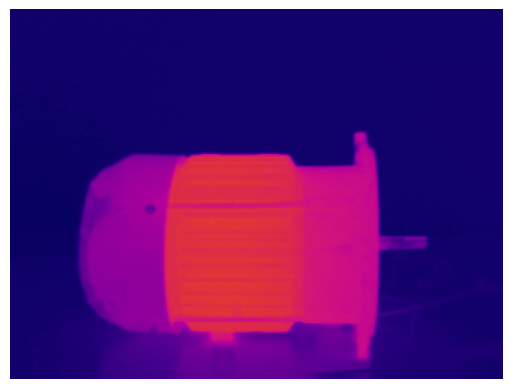

At full-load status

.
Predicting for r042.bmp...


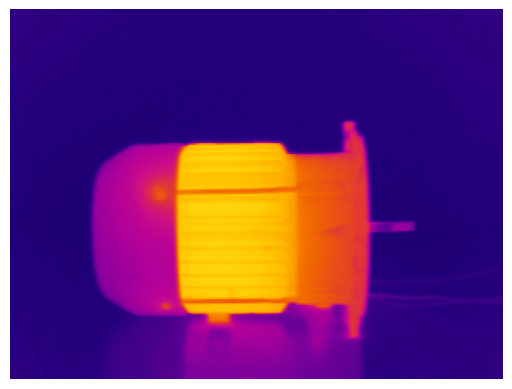

At full-load status

.
Predicting for r051.bmp...


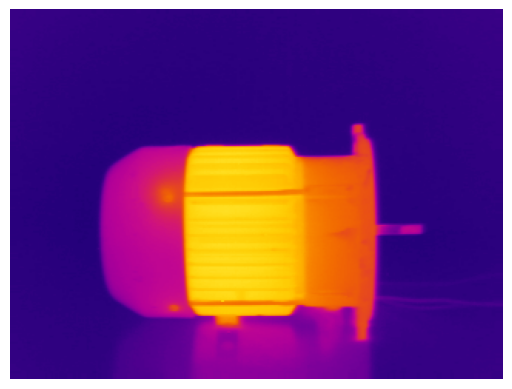

At full-load status

.
Epoch [1/5], Loss: 0.0916, Accuracy: 100.00%
Epoch [2/5], Loss: 0.2962, Accuracy: 81.36%
Epoch [3/5], Loss: 0.0061, Accuracy: 100.00%
Epoch [4/5], Loss: 0.0021, Accuracy: 100.00%
Epoch [5/5], Loss: 0.0008, Accuracy: 100.00%
validation Loss: 0.0003, Accuracy: 100.00%


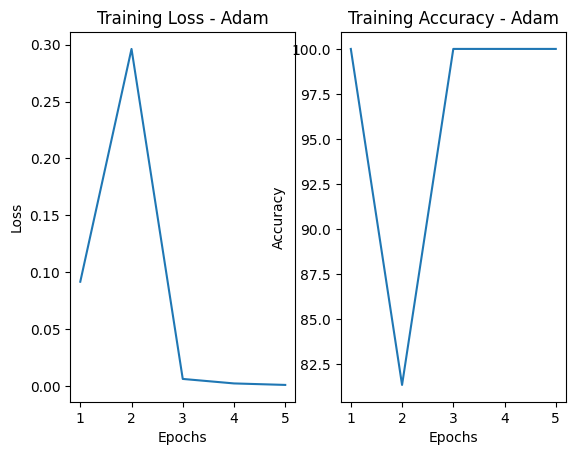

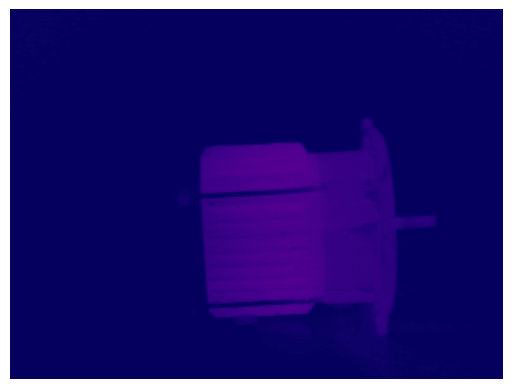

At no-load status

.
Predicting for 012.bmp...


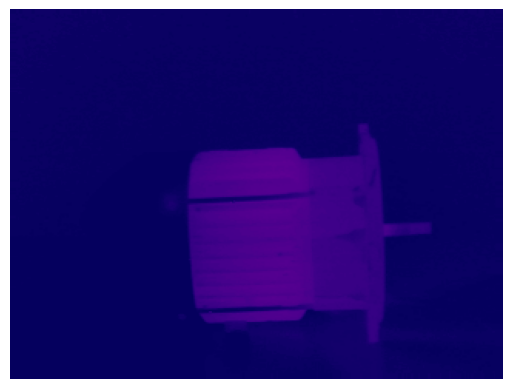

At no-load status

.
Predicting for 017.bmp...


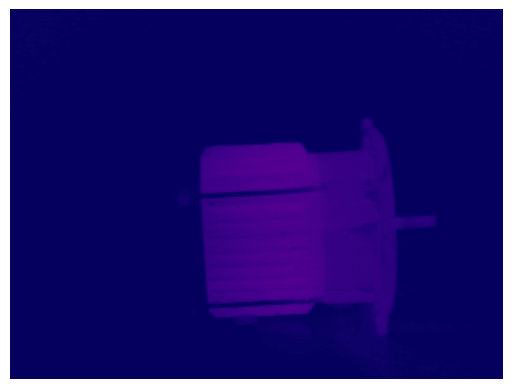

At no-load status

.
Predicting for f068.bmp...


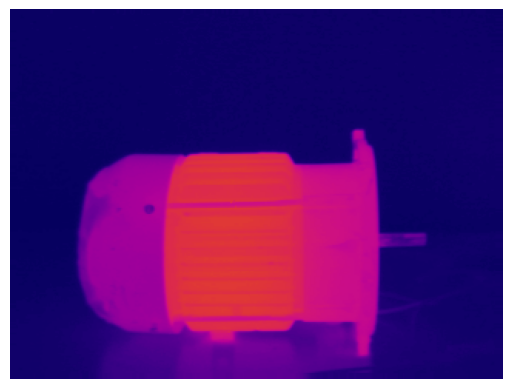

At full-load status

.
Predicting for f084.bmp...


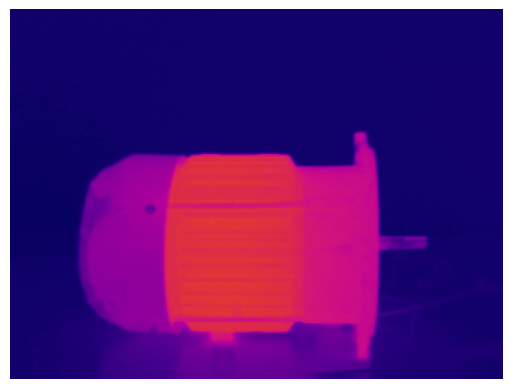

At full-load status

.
Predicting for r042.bmp...


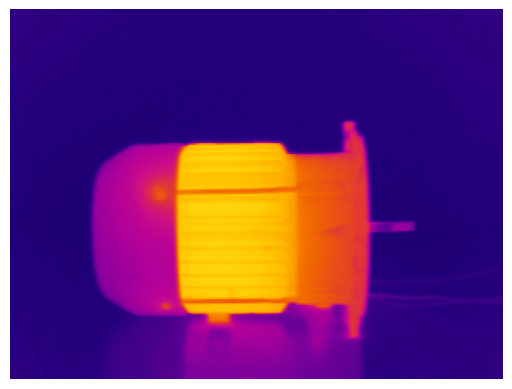

At full-load status

.
Predicting for r051.bmp...


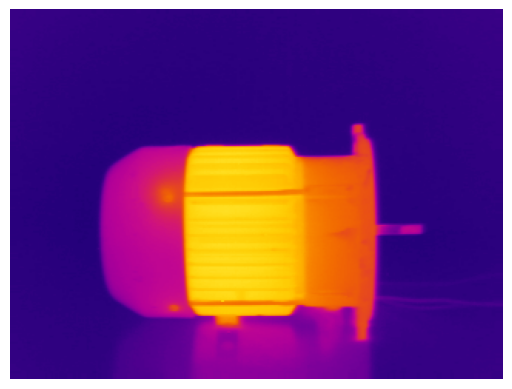

At full-load status

.
Epoch [1/5], Loss: 0.0003, Accuracy: 100.00%
Epoch [2/5], Loss: 0.0003, Accuracy: 100.00%
Epoch [3/5], Loss: 0.0004, Accuracy: 100.00%
Epoch [4/5], Loss: 0.0003, Accuracy: 100.00%
Epoch [5/5], Loss: 0.0003, Accuracy: 100.00%
validation Loss: 0.0003, Accuracy: 100.00%


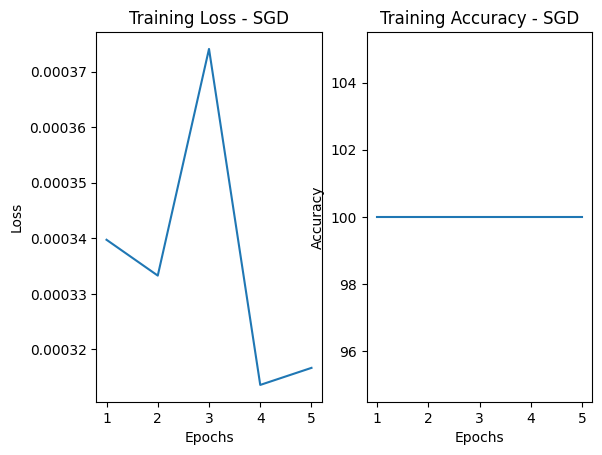

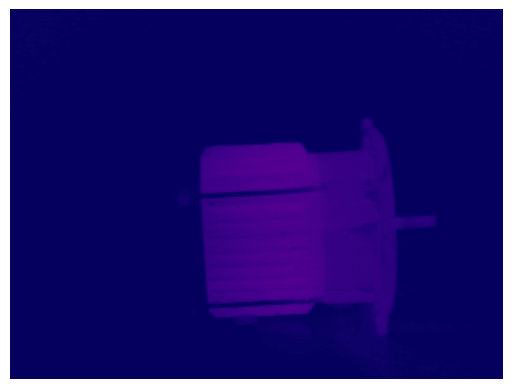

At no-load status

.
Predicting for 012.bmp...


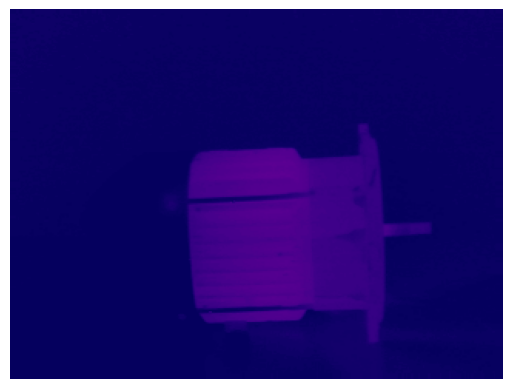

At no-load status

.
Predicting for 017.bmp...


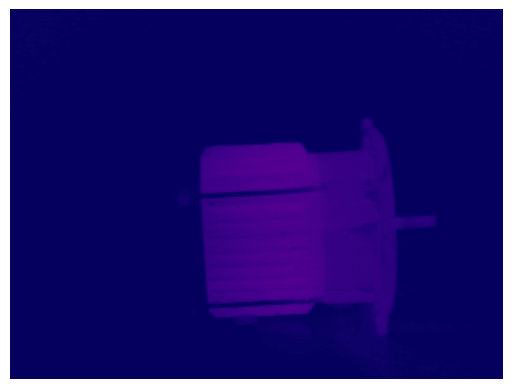

At no-load status

.
Predicting for f068.bmp...


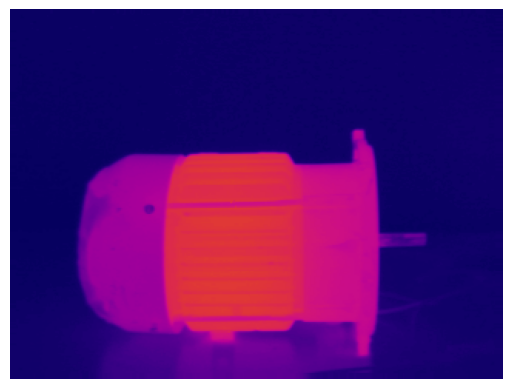

At full-load status

.
Predicting for f084.bmp...


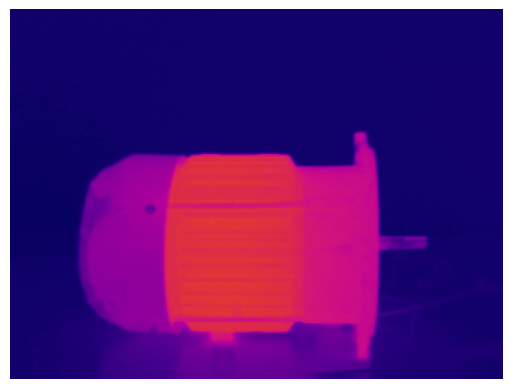

At full-load status

.
Predicting for r042.bmp...


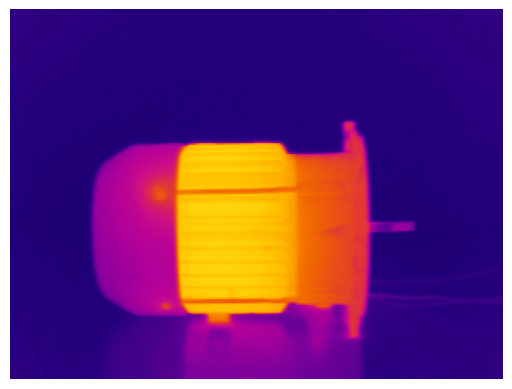

At full-load status

.
Predicting for r051.bmp...


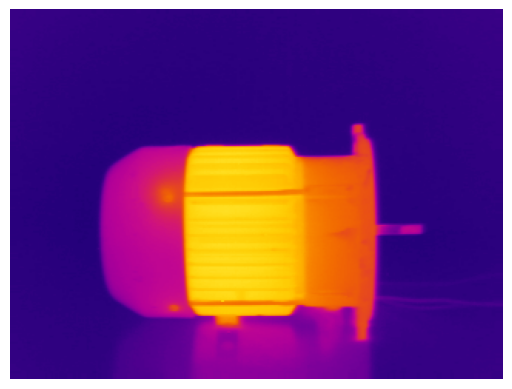

At full-load status

.


In [21]:
num_epochs = 5

for i, j in zip(optimizer, opti_name):
    train_loss, train_accuracy = train_model(model, train_loader, criterion, i, num_epochs)
    validate_model(model, val_loader, criterion)

    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs+1), train_loss)
    plt.title(f'Training Loss - {j}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accuracy)
    plt.title(f'Training Accuracy - {j}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.show()
    
    predict_image(image_path)
    predict_images_in_folder(test_path)


# Final Exam


Predicting for Full-Load_0.bmp...


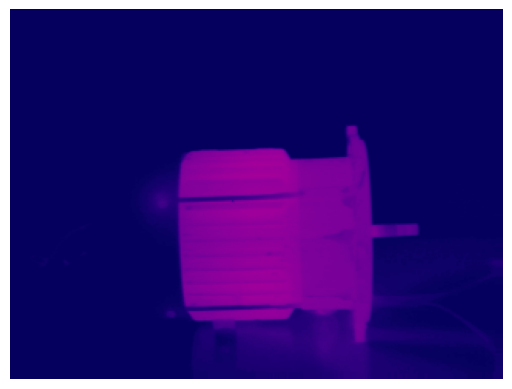

At full-load status

.
Predicting for Full-Load_1.bmp...


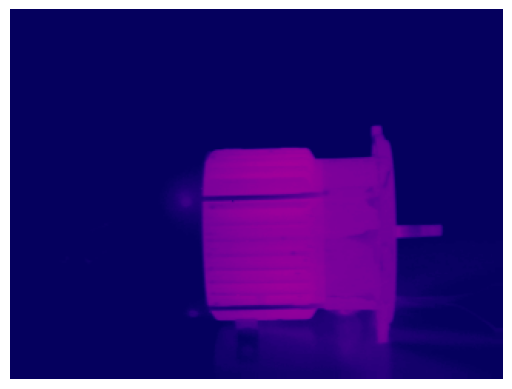

At full-load status

.
Predicting for Full-Load_2.bmp...


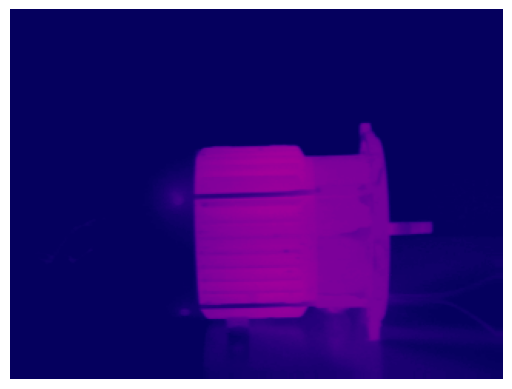

At full-load status

.
Predicting for No-Load_0.bmp...


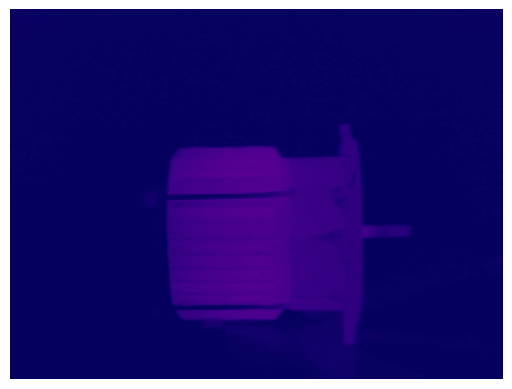

At no-load status

.
Predicting for No-Load_1.bmp...


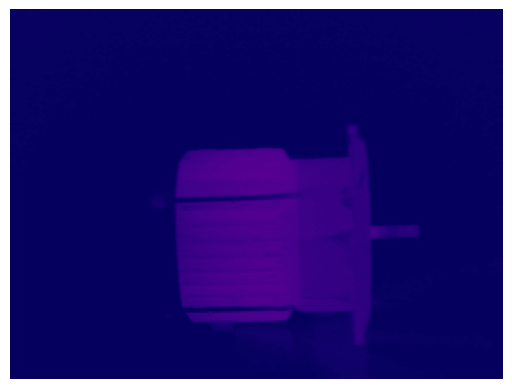

At no-load status

.
Predicting for No-Load_2.bmp...


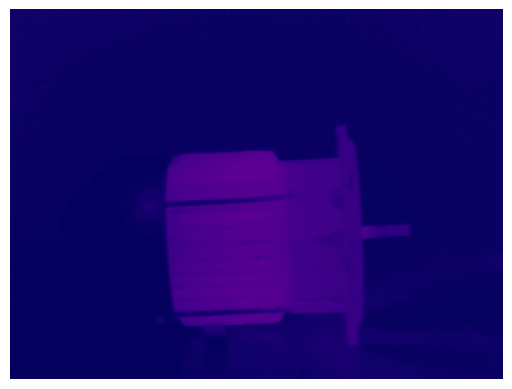

At no-load status

.


In [22]:
fe_path = "D:/martin03in/PUP/STB/2024/Trainings/DAP_Executive_Course/Part_II/ECDS-NeuralNets/Motor_Data/Final_Exam"
predict_images_in_folder(fe_path)